In [1]:
from mxlbricks import get_saadat2021, get_matuszynska2016npq
from model_validation import create_report_summary
import mxlbricks.names as n
from mxlpy import units

In [3]:
from model_validation import create_pamfit


create_pamfit(pfd=n.pfd(), model=get_saadat2021(), parameter_to_fit=["gamma0", "gamma1", "gamma2", "gamma3", "kZSat"])

ImportError: cannot import name 'create_pamfit' from 'model_validation' (/home/elouencorvest/Documents/GreenSloth/Validations/model_validation.py)

# Validating two mxlbrick models

## Saadat2021

In [4]:
m = get_saadat2021()

m.update_reaction(n.rubisco_carboxylase(), unit=units.mmol / (units.liter * units.second)) # Add Vc unit mM/s
;

''

In [3]:
m.get_raw_reactions().keys()

dict_keys(['ferredoxin_thioredoxin_reductase', 'tr_activation', 'tr_inactivation', 'atp_synthase', 'b6f', 'lhc_protonation', 'lhc_deprotonation', 'cyclic_electron_flow', 'violaxanthin_deepoxidase', 'zeaxanthin_epoxidase', 'fnr', 'ndh', 'PSII', 'PSI', 'mehler', 'ferredoxin_reductase', 'proton_leak', 'PTOX', 'lhc_state_transition_12', 'lhc_state_transition_21', 'rubisco_carboxylase', 'phosphoglycerate_kinase', 'gadph', 'triose_phosphate_isomerase', 'aldolase_dhap_gap', 'aldolase_dhap_e4p', 'fbpase', 'transketolase_gap_f6p', 'transketolase_gap_s7p', 'SBPase', 'ribose_phosphate_isomerase', 'ribulose_phosphate_epimerase', 'phosphoribulokinase', 'g6pi', 'phosphoglucomutase', 'ex_pga', 'ex_gap', 'ex_dhap', 'ex_g1p', 'mda_reductase_1', 'mda_reductase_2', 'ascorbate_peroxidase', 'glutathion_reductase', 'dehydroascorbate_reductase', 'ex_atp', 'ex_nadph'])

In [4]:
m.get_raw_reactions()["PSI"]

Reaction(fn=<function _rate_ps1 at 0x78a64cb749a0>, stoichiometry={'Plastocyanine (oxidised)': 1}, args=['A0', 'PSII_cross_section', 'PPFD'], unit=None)

(<Figure size 1000x500 with 4 Axes>,
 (<Axes: title={'center': 'Variables'}>, <Axes: title={'center': 'Fluxes'}>))

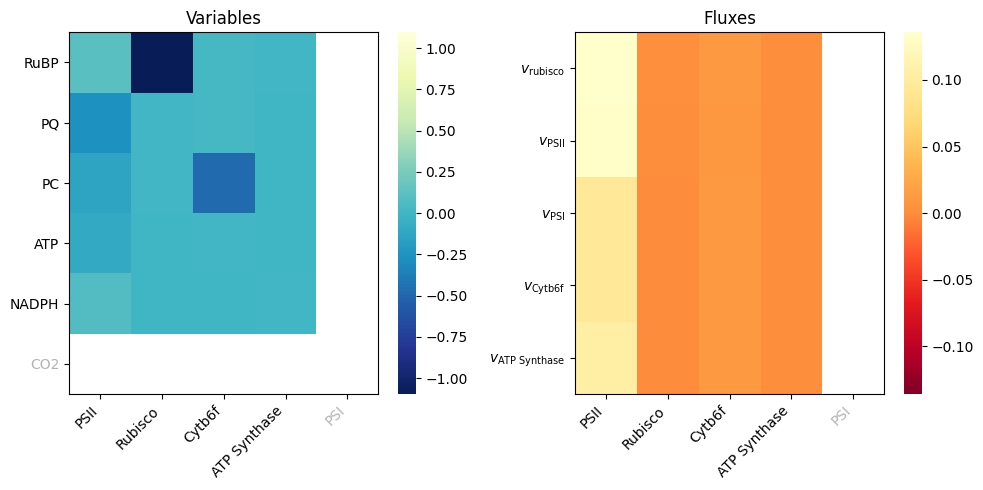

In [5]:
from model_validation import create_mca_fig

create_mca_fig(
    model=m,
    coeff_rubisco=n.kcat(n.rubisco_carboxylase()),
    coeff_psii="k2",
    coeff_psi=None,
    coeff_cytb6f=n.kcat(n.b6f()),
    coeff_atp_synthase=n.kf(n.atp_synthase()),
    rubp=n.rubp(),
    co2=n.co2(),
    pq=n.pq_ox(),
    pc=n.pc_ox(),
    atp=n.atp(),
    nadph=n.nadph(),
    v_rubisco=n.rubisco_carboxylase(),
    v_psii="PSII",
    v_psi="PSI",
    v_cytb6f=n.b6f(),
    v_atp_synthase=n.atp_synthase(),
)

In [5]:

create_report_summary(
    model=m,
    pfd=n.pfd(),
    co2=n.co2(),
    vc=n.rubisco_carboxylase(),
    file_prepend="saadat2021",
    flourescence=n.fluorescence(),
    atp=n.atp(),
    nadph=n.nadph(),
    rubp=n.rubp(),
    coeff_rubisco=n.kcat(n.rubisco_carboxylase())
);

100%|██████████| 100/100 [00:02<00:00, 35.81it/s]
INFO:root:Downloading 1 NEON DP1.00024.001 files totaling approximately 16.6 MB.


TypeError: create_mca_fig() missing 11 required positional arguments: 'coeff_cytb6f', 'coeff_atp_synthase', 'pq', 'pc', 'atp', 'nadph', 'v_rubisco', 'v_psii', 'v_psi', 'v_cytb6f', and 'v_atp_synthase'

## Matuzynska2016

In [3]:
# TODO: Finish adding args
# MCA does not work because I have not given enough coefficients yet
# TODO: Fix Fmin in Matuszynska2016NPQ model
create_report_summary(
    model=get_matuszynska2016npq(),
    pfd=n.pfd(),
    file_prepend="matuszynska2016npq",
    flourescence=n.fluorescence(),
    atp=n.atp(),
    coeff_psii="k2"
);

INFO:root:Downloading 1 NEON DP1.00024.001 files totaling approximately 16.6 MB.


ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7a3ff55037e0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 640x480 with 2 Axes>